In [ ]:
# Execute when running on Google Colab
# !pip install neograd

In [25]:
# Execute when running locally
import sys
sys.path.append('../../tests')
sys.path.append('../..')
import _setup
!pip install matplotlib
import matplotlib.pyplot as plt

You should consider upgrading via the '/Users/pranavsastry/Documents/py/neograd/tests/venv/bin/python3 -m pip install --upgrade pip' command.


In [26]:
import neograd as ng
import numpy as np
from neograd.nn.loss import BCE
from neograd.nn.optim import Adam
from neograd.nn.utils import get_batches
from sklearn.datasets import load_digits

In [27]:
X_train,_ = load_digits(return_X_y=True) # load data

In [28]:
num_train = X_train.shape[0] # number of train examples
num_iter = 200 # number of iterations
batch_size = 200 # batch size in each iteration

In [29]:
# normalize inputs
X_train_norm = (X_train - np.mean(X_train, axis=1, keepdims=True))/np.std(X_train, axis=1, keepdims=True)

In [30]:
X_train = ng.tensor(X_train_norm)

In [31]:
class NN(ng.nn.Model):
    def __init__(self):
        self.generator = ng.nn.Sequential(
            ng.nn.Linear(64,100),
            ng.nn.ReLU(),
            ng.nn.Linear(100,80),
            ng.nn.ReLU(),
            ng.nn.Linear(80,64)
        )
        self.discriminator = ng.nn.Sequential(
            ng.nn.Linear(64,50),
            ng.nn.ReLU(),
            ng.nn.Linear(50,25),
            ng.nn.ReLU(),
            ng.nn.Linear(25,1),
            ng.nn.Sigmoid()
        )
    
    def forward(self, inputs):
        noise = ng.tensor(np.random.randn(num_train, 64))
        generated = self.generator(noise)
        discriminator_fake = self.discriminator(generated)
        discriminator_real = self.discriminator(inputs)
        return discriminator_fake, discriminator_real

In [32]:
model = NN()

model.discriminator.freeze()
optim_generator = Adam(model.get_params(), 5e-3)
model.discriminator.unfreeze()

model.generator.freeze()
optim_discriminator = Adam(model.get_params(), 5e-3)
model.generator.freeze()

loss_fn = BCE()

In [33]:
def train_generator(discriminator_fake, discriminator_real):
    optim_generator.zero_grad()
    optim_discriminator.zero_grad()
    loss_generator = loss_fn(discriminator_fake, ng.tensor(np.ones((num_train,1))))
    loss_generator.backward(retain_graph=True) # retain_graph is True to retain all components that lead to discriminator_fake
    optim_generator.step()
    print("Generator:", loss_generator.data)

In [34]:
def train_discriminator(discriminator_fake, discriminator_real):
    optim_generator.zero_grad(all_members=True)
    optim_discriminator.zero_grad(all_members=True)
    loss_real = loss_fn(discriminator_real, ng.tensor(np.ones((num_train,1))))
    loss_real.backward(retain_graph=True)
    optim_discriminator.step()
    loss_fake = loss_fn(discriminator_fake, ng.tensor(np.zeros((num_train,1))))
    loss_fake.backward()
    optim_discriminator.step()
    print("Discriminator:", (loss_real.data+loss_fake.data)/2)

In [35]:
def train(discriminator_fake, discriminator_real):
    train_generator(discriminator_fake, discriminator_real)
    train_discriminator(discriminator_fake, discriminator_real)

In [36]:
for i in range(num_iter):
    print(f'\n\nIter {i+1}/{num_iter}')
    discriminator_fake, discriminator_real = model(X_train)
    train(discriminator_fake, discriminator_real)



Iter 1/200
Generator: 2.2487684050517323
Discriminator: 9.396914879218727


Iter 2/200
Generator: 1.383857483653156
Discriminator: 9.703855631363437


Iter 3/200
Generator: 0.6803965957940115
Discriminator: 10.036044999362833


Iter 4/200
Generator: 0.5304786602306811
Discriminator: 10.096507812375437


Iter 5/200
Generator: 0.3228958383051359
Discriminator: 10.200184998789265


Iter 6/200
Generator: 0.19604647604234215
Discriminator: 10.26360967945205


Iter 7/200
Generator: 0.11532145608373065
Discriminator: 10.303972189431343


Iter 8/200
Generator: 0.13838574750440918
Discriminator: 10.292440043721003


Iter 9/200
Generator: 0.12685360179210373
Discriminator: 10.298206116577155


Iter 10/200
Generator: 0.08072501895861142
Discriminator: 10.321270407993902


Iter 11/200
Generator: 0.03459643612511914
Discriminator: 10.344334699410648


Iter 12/200
Generator: 0.023064290416746062
Discriminator: 10.350100772264833


Iter 13/200
Generator: -1.0000000822403705e-09
Discriminator: 10.36

Discriminator: 10.35586684511902


Iter 102/200
Generator: -1.0000000822403705e-09
Discriminator: 10.361632917973209


Iter 103/200
Generator: -1.0000000822403705e-09
Discriminator: 10.361632917973209


Iter 104/200
Generator: -1.0000000822403705e-09
Discriminator: 10.361632917973209


Iter 105/200
Generator: 0.01153214470837299
Discriminator: 10.35586684511902


Iter 106/200
Generator: 0.01153214470837299
Discriminator: 10.35586684511902


Iter 107/200
Generator: -1.0000000822403705e-09
Discriminator: 10.361632917973209


Iter 108/200
Generator: -1.0000000822403705e-09
Discriminator: 10.361632917973209


Iter 109/200
Generator: -1.0000000822403705e-09
Discriminator: 10.361632917973209


Iter 110/200
Generator: -1.0000000822403705e-09
Discriminator: 10.361632917973209


Iter 111/200
Generator: -1.0000000822403705e-09
Discriminator: 10.361632917973209


Iter 112/200
Generator: -1.0000000822403705e-09
Discriminator: 10.361632917973209


Iter 113/200
Generator: 0.01153214470837299
Discrim

In [37]:
noise = ng.tensor(np.random.randn(1, 64))
generated = model.generator(noise)

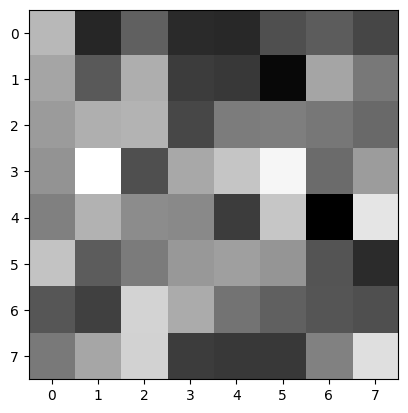

In [38]:
plt.imshow(generated.data.reshape(8,8), cmap='gray')